# Fatal Police Shootings in the U.S. 2015-2017

In [34]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import geopandas as gpd

warnings.filterwarnings('ignore')

# 1. Introduction to the data.

The dataset contains information on incidents of police shootings, encompassing various attributes such as demographics, incident details, and geographical information.

In [35]:
#Reading data
data = pd.read_csv('shootings.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1.1 Key Features

1. **Demographics**:
   - *Age:* Range of ages for individuals involved in the incidents.
   - *Gender:* Distribution of male and female individuals.
   - *Race:* Categorical distribution based on race/ethnicity.

2. **Incident Details**:
   - *Date:* Timestamps of when the incidents occurred.
   - *Manner of Death:* Description of how the death occurred (e.g., shot, shot and Tasered).
   - *Armed:* Type of armament involved (e.g., gun, knife, unarmed).
   - *Signs of Mental Illness:* Indication of whether the individual showed signs of mental illness.
   - *Threat Level:* Level of threat perceived during the incident.
   - *Flee:* Description of whether the individual was fleeing the scene.

3. **Geographical Information**:
   - *City:* Locations where the incidents took place.
   - *State:* State-wise distribution of incidents.
   - *Latitude and Longitude:* Geospatial coordinates of the incidents.


## 1.2 Aim of the Project

The primary goal of this project is to comprehensively analyze the shootings dataset, aiming to get insights and patterns from the recorded incidents. 

Understanding the distribution of incidents across various states is a focal point, seeking to identify states with higher occurrence rates or dominance in these incidents. A crucial aspect of this analysis involves data cleaning procedures to ensure the reliability of the subsequent insights.

The primary objectives investigating potential associations between the variable 'race' and other key factors such as 'age', 'flee', and 'armed'. This exploration aims to show whether there's a relationship between race and these variables.

Also, this project will aim to look at majority of the variables in the data.


## 1.3 Basic Statistics About the Data

The dataset consists of 2142 records and 14 columns. Among these columns, 'id' and 'age' are the only numerical features. It's important to note the presence of missing values in some columns, indicating potential data gaps that require attention in the subsequent analysis.

The 'id' column likely represents a unique identifier for each incident, while 'age' denotes the age of the individuals involved. Exploring the distribution of ages might offer insights into the demographics of these incidents.

Other columns in the dataset might contain categorical or textual information, such as 'name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', and 'body_camera'. These columns are likely to provide context and descriptive details about each incident.

In [22]:
# Information about the DataFrame (data types, non-null counts, etc.)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 2141
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       1986 non-null   int64         
 1   name                     1986 non-null   object        
 2   date                     1986 non-null   datetime64[ns]
 3   manner_of_death          1986 non-null   object        
 4   armed                    1986 non-null   object        
 5   age                      1986 non-null   float64       
 6   gender                   1986 non-null   object        
 7   race                     1986 non-null   object        
 8   city_name                1986 non-null   object        
 9   state                    1986 non-null   object        
 10  signs_of_mental_illness  1986 non-null   bool          
 11  threat_level             1986 non-null   object        
 12  flee                     1986 non-null 

# 2. Data cleaning

This section will provide insights about the data:
    - Are there any missing values?
    - How to deal with missing values?
    - Are there any duplicates?
    - Are there any other notable insights?


From the previous section we saw what data types columns in our data have. We know that there is 'date' column, but there is no date data type. Let's create one:

In [36]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

We can see that 'date' column now is in datetime64 data type.

In [37]:
print(data['date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 2142 entries, 0 to 2141
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2142 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.9 KB
None


We can see that our data begins from early 2015 and ends in the beginning of 2017.

In [38]:
print(data.date.min())
print(data.date.max())

2015-01-02 00:00:00
2017-02-28 00:00:00


## 2.1 Checking for duplicates

To search for duplicated values firstly we need to remove first column from the data as he is unique for each row.

In [39]:
# Remove the first column (assuming it's the 'id' column)
data = data.iloc[:, 1:]

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Output the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
                     name       date manner_of_death armed   age gender race  \
2053  Jamake Cason Thomas 2017-02-03            shot   gun  22.0      M    B   

         city state  signs_of_mental_illness threat_level flee  body_camera  
2053  Rowland    NC                    False       attack  Car        False  


We can see that there are some duplicates, so let's remove them.

In [40]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

# Check the shape of the dataframe before and after removing duplicates
print("Shape before removing duplicates:", data.shape)
print("Shape after removing duplicates:", data_no_duplicates.shape)

Shape before removing duplicates: (2142, 13)
Shape after removing duplicates: (2141, 13)


We have removed one row from our data.

## 2.2 Checking for missing values

This section will provide an overview about missing values in the data.

In [41]:
# Check for missing values
missing_values = data.isnull().sum()

# Filter and display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
name       19
armed       6
age        43
gender      1
race      103
flee       36
dtype: int64


We can see that there are quite a lot of missing values in six columns - 'name', 'armed', 'age', 'gender', 'race' and 'flee'.

In the following sections we are going to analyse 'race', 'armed', 'age' and 'flee' columns, therefore, let's remove missing values for these columns.

In [53]:
data_no_nulls = data_no_duplicates.dropna(subset=['race', 'armed', 'age', 'flee'])

## 2.3 Outliers

After removing missing values and duplicates we can look if there are any outliers. From the previous description we can see that there is only one numerical column 'age', which can have outliers.

In [57]:
data_no_nulls['age'].describe()

count    1985.000000
mean       36.117884
std        12.648880
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        83.000000
Name: age, dtype: float64

We can see that the youngest person who was shot were 6 years old child and the oldest is 83 years old senior. So the age range of the people who have died is not unusual. However, let's look at the boxplot.

Also, we can see that the mean of victims is 36 years.

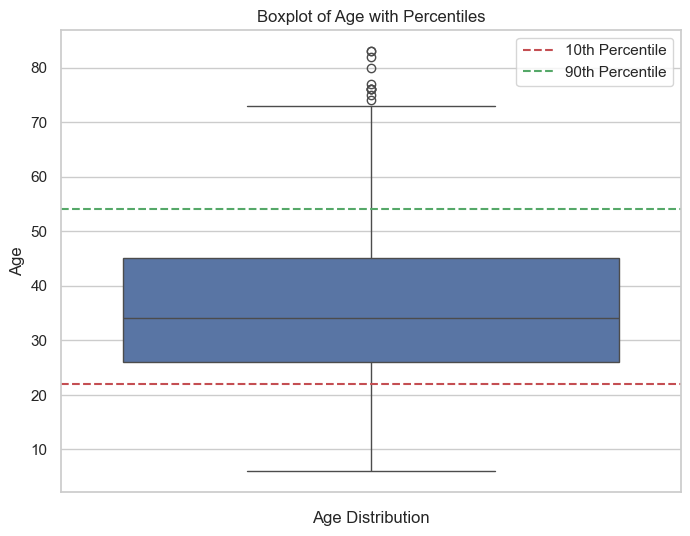

In [61]:
# Calculate the 10th and 90th percentiles for 'age'
percentiles = data_no_nulls['age'].quantile([0.1, 0.9])

# Create a horizontal boxplot for the 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=data_no_nulls, orient='h')
plt.axhline(y=percentiles[0.1], color='r', linestyle='--', label='10th Percentile')
plt.axhline(y=percentiles[0.9], color='g', linestyle='--', label='90th Percentile')
plt.title('Boxplot of Age with Percentiles')
plt.xlabel('Age Distribution')
plt.ylabel('Age')
plt.legend()
plt.show()

We can see that there are quite few values outside of percentiles. However, as we mentioned previously range of the age is not unusual. Values outside of percentiles can be very valuable for our analysis, therefore, all the data will be kept for future.

## Fatal shootings in the different States

In this section we are going to analyse deeper different aspects related to US States.

We will use data after removing duplicates and missing values.

In ordet to plot geographical graphs we need additional data about US States. To create geographical graphs we need longitude and altitude. For this we have inported additional dataset called 'uscities'

In [43]:
uscities = pd.read_csv('uscities.csv')
uscities.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11226.2,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3202.3,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4648.7,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4728.2,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1382.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


From this dataset we are going to join three columns - latitude, longitude and state_name.

In [44]:
# Renaming the 'city' column in 'data_no_nulls' to 'city_name' to avoid confusion
data_no_nulls.rename(columns={'city': 'city_name'}, inplace=True)

# Merging 'data_no_nulls' and 'uscities' on 'state' and 'city_name' in 'data_no_nulls' and 'city' and 'state_id' in 'uscities'
merged_data = pd.merge(data_no_nulls, uscities, how='left', left_on=['state', 'city_name'], right_on=['state_id', 'city'])

# Selecting only the desired columns (latitude, longitude and state_name)
lat_lng_state = merged_data[['lat', 'lng', 'state_name']]

# Adding the 'lat' and 'lng' columns to the 'data_no_nulls' DataFrame
data_no_nulls[['lat', 'lng','state_name']] = lat_lng_state

Also, in order to create interactive geographical graph we need to import US state shape information. This data is imported and visible in 'us_map'.

In [51]:
us_map = gpd.read_file('States_shapefile.shp')
us_map.head(10)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,8,None,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,9,None,DC,DISTRICT OF COLUMBIA,P,927,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,10,None,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


We have noticed that some columns have upper case letters. That might create some issues later on so we need to have all columns for 'us_map' in lower cases.

In [52]:
# Convert column names to lowercase
us_map.columns = map(str.lower, us_map.columns)

# Now, all column names in us_map are lowercase
print(us_map.columns)

Index(['fid', 'program', 'state_code', 'state_name', 'flowing_st', 'fid_1',
       'geometry'],
      dtype='object')


After adding additional data and performing some changes to the data sets now we can start analysing 

In [7]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Display the count of each race
print(race_counts)

race
W    1022
B     523
H     355
A      32
O      28
N      26
Name: count, dtype: int64


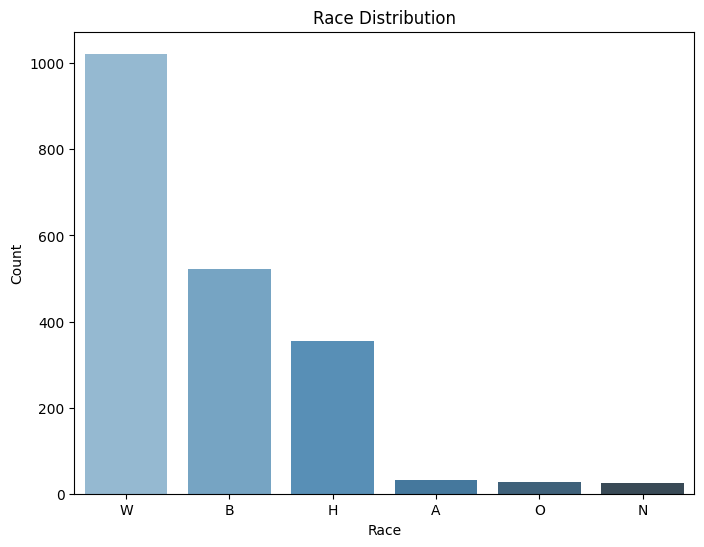

In [8]:
plt.figure(figsize=(8, 6))
race_counts = data['race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

sns.barplot(x='Race', y='Count', data=race_counts, palette='Blues_d')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [9]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Define total population for W and B
total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

# Calculate percentages for W and B
percentage_W = (race_counts['W'] / total_population_W) * 100
percentage_B = (race_counts['B'] / total_population_B) * 100
percentage_H = (race_counts['H'] / total_population_H) * 100
percentage_A = (race_counts['A'] / total_population_A) * 100
percentage_N = (race_counts['N'] / total_population_N) * 100

# Create a DataFrame for percentages
race_percentages = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Total Population': [total_population_W, total_population_B, total_population_H, total_population_A, total_population_N],
    'Percentage': [percentage_W, percentage_B, percentage_H, percentage_A, percentage_N]
})

# Display the DataFrame
print(race_percentages)

  Race  Total Population  Percentage
0    W         200000000    0.000511
1    B          40000000    0.001307
2    H          57500000    0.000617
3    A          18000000    0.000178
4    N           2400000    0.001083


In [10]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Define total population for W and B
total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

total_population = 323000000

# Calculate percentages for W and B
NumberOfKillings_W = (race_counts['W'] / total_population_W) * 1000000
NumberOfKillings_B = (race_counts['B'] / total_population_B) * 1000000
NumberOfKillings_H = (race_counts['H'] / total_population_H) * 1000000
NumberOfKillings_A = (race_counts['A'] / total_population_A) * 1000000
NumberOfKillings_N = (race_counts['N'] / total_population_N) * 1000000

# Round the calculated values and convert to integers
NumberOfKillings_W = int(round(NumberOfKillings_W))
NumberOfKillings_B = int(round(NumberOfKillings_B))
NumberOfKillings_H = int(round(NumberOfKillings_H))
NumberOfKillings_A = int(round(NumberOfKillings_A))
NumberOfKillings_N = int(round(NumberOfKillings_N))

# Calculate percentages for W and B
NumberOfKillings_TotalPopulation_W = (race_counts['W'] / total_population_W) * total_population
NumberOfKillings_TotalPopulation_B = (race_counts['B'] / total_population_B) * total_population
NumberOfKillings_TotalPopulation_H = (race_counts['H'] / total_population_H) * total_population
NumberOfKillings_TotalPopulation_A = (race_counts['A'] / total_population_A) * total_population
NumberOfKillings_TotalPopulation_N = (race_counts['N'] / total_population_N) * total_population

# Round the calculated values and convert to integers
NumberOfKillings_TotalPopulation_W = int(round(NumberOfKillings_TotalPopulation_W))
NumberOfKillings_TotalPopulation_B = int(round(NumberOfKillings_TotalPopulation_B))
NumberOfKillings_TotalPopulation_H = int(round(NumberOfKillings_TotalPopulation_H))
NumberOfKillings_TotalPopulation_A = int(round(NumberOfKillings_TotalPopulation_A))
NumberOfKillings_TotalPopulation_N = int(round(NumberOfKillings_TotalPopulation_N))

# Create a DataFrame for percentages
race_killings = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Killings per Million': [NumberOfKillings_W, NumberOfKillings_B, NumberOfKillings_H, NumberOfKillings_A, NumberOfKillings_N],
    'Killings per Total US population': [NumberOfKillings_TotalPopulation_W, NumberOfKillings_TotalPopulation_B, NumberOfKillings_TotalPopulation_H
                                         , NumberOfKillings_TotalPopulation_A, NumberOfKillings_TotalPopulation_N]
})

# Display the DataFrame
print(race_killings)

  Race  Killings per Million  Killings per Total US population
0    W                     5                              1651
1    B                    13                              4223
2    H                     6                              1994
3    A                     2                               574
4    N                    11                              3499


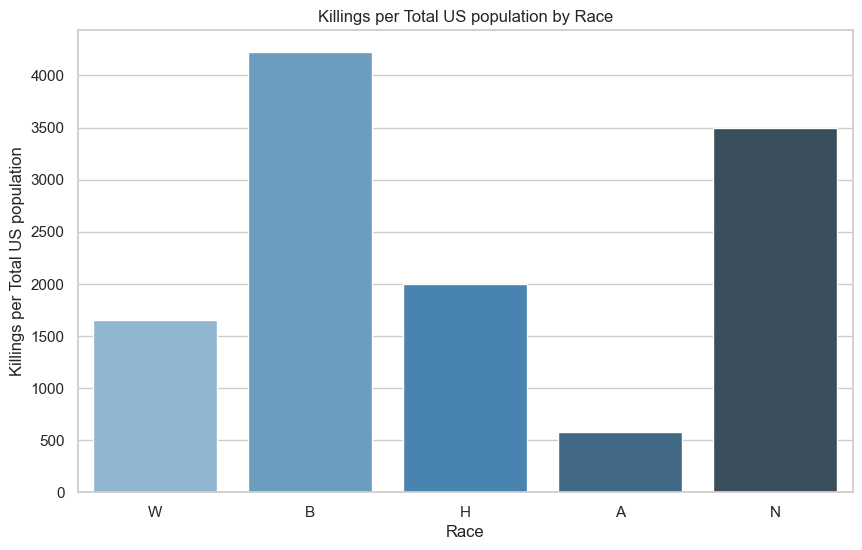

In [11]:
# Plotting the bar plot using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(data=race_killings,  x='Race', y='Killings per Total US population', palette='Blues_d')
plt.xlabel('Race')
plt.ylabel('Killings per Total US population')
plt.title('Killings per Total US population by Race')
plt.show()

In [14]:
# Assuming you have a DataFrame named 'data' containing 'city_name' and 'state' columns

# Create the new 'city_state' column by concatenating 'city_name' and 'state'
data['city_state'] = data['city_name'] + ', ' + data['state']

# Display the updated DataFrame with the new 'city_state' column
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city_name,state,signs_of_mental_illness,threat_level,flee,body_camera,lat,lng,city_state
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,47.2186,-123.1121,"Shelton, WA"
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,45.4920,-122.8725,"Aloha, OR"
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,37.6895,-97.3443,"Wichita, KS"
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,37.7558,-122.4449,"San Francisco, CA"
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,40.3660,-104.7390,"Evans, CO"


In [46]:
# Load the US map shapefile or GeoJSON file containing state boundaries
us_states_map = gpd.read_file('States_shapefile.shp')  # Replace with your actual file path

# Convert column names to lowercase
us_states_map.columns = map(str.lower, us_states_map.columns)

# Now, all column names in us_states_map are lowercase
print(us_states_map.columns)

Index(['fid', 'program', 'state_code', 'state_name', 'flowing_st', 'fid_1',
       'geometry'],
      dtype='object')


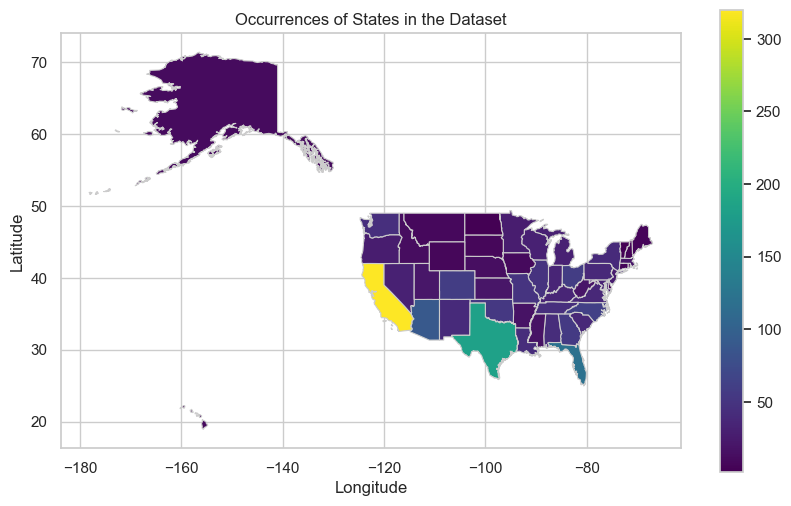

In [49]:
# Get the count of occurrences for each state
state_counts = data_no_nulls['state_name'].value_counts().reset_index()
state_counts.columns = ['state_name', 'Occurrences']

# Merge state counts with US map data
merged_data = pd.merge(us_states_map, state_counts, on='state_name', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the choropleth map
merged_data.plot(column='Occurrences', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set titles and labels
plt.title('Occurrences of States in the Dataset')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [50]:
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

# Assuming you have the DataFrame 'data' with 'state_name' and 'age' columns

# Get the count of occurrences and average age for each state
state_stats = data_no_nulls.groupby('state_name')['age'].agg(['count', 'mean']).reset_index()
state_stats.columns = ['state_name', 'Occurrences', 'Average_Age']

# Merge state counts with US map data
merged_data = pd.merge(us_states_map, state_stats, on='state_name', how='left')

# Create a folium map centered around the US
m = folium.Map(location=[37, -102], zoom_start=4)

# Create a colormap
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=merged_data['Occurrences'].min(), vmax=merged_data['Occurrences'].max())

# Add states to the map with colors based on occurrences
for idx, row in merged_data.iterrows():
    state_occurrences = row['Occurrences']
    average_age = row['Average_Age']
    color = colormap(state_occurrences)
    tooltip_text = f"{row['state_name']}<br>Killings: {state_occurrences}<br>Age: {average_age:.1f}"
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, fill_color=color: {
            'fillColor': fill_color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=tooltip_text
    ).add_to(m)

# Display the map
m

## Appendix

Information about 'race' population in US was taken from - https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/population/.
Information about longitude and altitude information was taken from - https://simplemaps.com/data/us-cities.
Shape of the US map was taken from - https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e/explore?location=31.392059%2C-106.491703%2C4.00.